# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Scaling the data
from sklearn.preprocessing import StandardScaler  

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *
from sklearn.model_selection import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
%matplotlib notebook

# Data Import (pre-menopause)

In [22]:
data= pd.read_csv('oc_pre_outlier_proc.csv')
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO,BASO1,BUN,Ca,CA125,CA199,CA724,CEA,CL,CO2CP,CREA,DBIL,EO,EO1,GGT,GLO,GLU,HCT,HE4,HGB,IBIL,K,LYM,LYM1,MCH,MCV,Mg,MONO,MONO1,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Type
0,3.580000,19.360000,47,45.400000,56.000000,11.000000,24.000000,0.010000,0.300000,5.350000,2.480000,15.360000,36.480000,6.420000,1.400000,107.400000,19.900000,95.768989,2.000000,0.040000,1.000000,16.000000,28.500000,4.670000,0.2857,126.071034,91.417547,3.500000,5.36,0.650000,16.80,33.700000,101.453859,0.780000,0.220000,5.700000,11.700000,141.300000,76.200000,0.090000,13.400000,1.460000,74.000000,3.169092,13.700000,5.500000,73.900000,396.40000,1
1,1.500000,18.400000,39,45.400000,77.000000,9.000000,18.000000,0.030000,0.600000,3.800000,2.570000,56.080000,12.180000,5.205010,0.770000,102.600000,22.200000,48.000000,4.700000,0.030000,0.600000,10.000000,32.500000,4.640000,0.3910,47.560000,131.000000,10.100000,4.30,1.100000,23.70,28.400000,84.600000,1.000000,0.250000,5.400000,11.400000,138.900000,69.700000,0.130000,15.200000,0.970000,112.000000,4.620000,12.000000,14.800000,77.900000,209.20000,1
2,2.360000,19.970000,45,35.000000,47.000000,21.000000,27.000000,0.010000,0.100000,4.890000,2.480000,219.808907,11.150000,12.120032,0.420000,99.600000,26.200000,70.300000,2.200000,0.110000,1.600000,24.000000,31.500000,4.070000,0.3830,126.071034,122.000000,3.100000,4.77,1.980000,28.80,27.700000,87.000000,1.080000,0.675825,10.000000,10.400000,141.000000,59.500000,0.280000,11.900000,0.940000,272.000000,4.400000,13.400000,5.300000,66.500000,206.00000,1
3,3.790000,17.390000,44,32.900000,118.000000,32.791227,32.000000,0.020000,0.420000,4.470000,2.490000,55.970000,22.570000,0.740000,1.330000,99.300000,20.100000,80.700000,5.900000,0.010000,0.190000,38.239033,39.400000,7.170469,0.3060,49.950000,96.500000,2.200000,4.89,0.520000,11.10,23.962632,76.546141,0.930000,0.070000,1.510000,9.490000,132.493948,86.800000,0.265000,19.100000,0.680000,279.000000,4.440000,16.658245,8.100000,72.300000,218.20000,1
4,6.467504,21.870000,53,40.276145,74.198102,21.993490,18.769079,0.020000,0.500000,2.600000,2.240000,219.808907,58.787461,10.265926,4.028906,103.200000,21.300000,44.000000,3.128614,0.060000,1.500000,19.156031,30.921788,7.100000,0.4210,14.923059,138.000000,5.961062,4.20,1.280000,32.70,29.700000,90.700000,0.658654,0.190000,4.800000,12.100000,137.700000,60.500000,0.180000,16.800000,1.500000,148.000000,4.640000,12.100000,9.089676,69.669126,151.90000,1
5,1.010000,23.630000,38,36.300000,64.000000,32.791227,34.791227,0.000000,0.400000,2.500000,2.420000,48.140000,18.790000,4.179212,0.640000,98.300000,22.600000,41.300000,2.400000,0.000000,0.800000,18.000000,42.798639,4.910000,0.3070,51.380000,91.417547,3.100000,4.43,1.400000,38.30,23.962632,76.546141,0.940000,0.200000,4.100000,9.100000,140.100000,56.400000,0.250000,17.400000,1.010000,277.000000,4.960000,16.658245,5.500000,79.600000,140.10000,1
6,4.700000,16.860000,30,40.800000,77.000000,16.000000,12.000000,0.074478,1.230000,5.780000,2.430000,21.460000,11.680000,10.070000,0.660000,100.700000,25.900000,64.100000,2.000000,0.010000,0.230000,16.000000,31.100000,4.090000,0.4560,43.800000,147.000000,6.400000,4.86,3.012254,49.70,29.100000,90.200000,0.890000,0.350000,5.430000,6.550000,138.600000,43.400000,0.228000,16.900000,1.460000,348.000000,5.050000,14.000000,8.400000,71.900000,210.30000,1
7,1.930000,23.040000,34,51.500000,68.000000,7.000000,21.000000,0.010000,0.200000,3.820000,2.800000,120.367667,18.091149,5.714500,0.380000,105.700000,20.500000,63.000000,2.100000,0.000000,0.000000,12.000000,29.200000,3.710000,0.3480,64.806412,105.000000,3.500000,4.74,0.820000,14.50,24.900000,82.700000,1.000000,0.220000,3.900000,11.600000,144.500000,81.400000,0.260000,13.400000,1.160000,224.000000,4.210000,15.500000,5.600000,80.700000,162.10000,1
8,6.467504,15.570000,42,35.400000,83.000000,10.000000,16.000000,0.040000,0.600000,2.750000,2.490000,219.808907,58.787461,7.714866,4.182708,103.200000,27.900000,51.000000,1.700000,0.050000,0.700000,11

In [23]:
x= data.drop("Type",axis=1)
y= data["Type"]

In [24]:
x.shape

(230, 48)

# Standardization

In [25]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x)

# Classification models and metrics define

In [26]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier() 

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss',random_state=100)

In [27]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

# Performance of classifiers on all features

In [12]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.954212
score_time           2.356198
test_accuracy       85.652174
test_recall         65.714286
test_specificity    95.458333
test_gmean          78.598006
test_roc            80.586310
test_precision      89.154762
test_mcc            67.278566
dtype: float64

In [13]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.103536
score_time           4.711535
test_accuracy       76.956522
test_recall         31.428571
test_specificity    99.333333
test_gmean          53.878247
test_roc            65.380952
test_precision      97.500000
test_mcc            45.918832
dtype: float64

In [14]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.368493
score_time           0.465517
test_accuracy       84.347826
test_recall         58.928571
test_specificity    96.750000
test_gmean          74.892616
test_roc            77.839286
test_precision      91.333333
test_mcc            64.104842
dtype: float64

In [28]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.062529
score_time           0.509171
test_accuracy       85.217391
test_recall         73.392857
test_specificity    90.833333
test_gmean          80.996307
test_roc            82.113095
test_precision      83.201465
test_mcc            67.568933
dtype: float64

In [29]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.309690
score_time           1.086948
test_accuracy       83.043478
test_recall         70.714286
test_specificity    88.875000
test_gmean          77.948131
test_roc            79.794643
test_precision      79.074481
test_mcc            62.581607
dtype: float64

In [17]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             4.450629
score_time           0.437346
test_accuracy       85.652174
test_recall         71.071429
test_specificity    92.833333
test_gmean          80.328192
test_roc            81.952381
test_precision      86.694444
test_mcc            68.323040
dtype: float64

In [18]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            19.058440
score_time           0.354116
test_accuracy       86.086957
test_recall         70.892857
test_specificity    93.458333
test_gmean          80.871761
test_roc            82.175595
test_precision      85.404762
test_mcc            68.153323
dtype: float64

In [19]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            26.536686
score_time           0.780165
test_accuracy       86.086957
test_recall         71.250000
test_specificity    93.500000
test_gmean          80.818595
test_roc            82.375000
test_precision      86.075397
test_mcc            68.600348
dtype: float64

In [30]:
# xgboost
score = cross_validate(nb, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.213923
score_time           0.372133
test_accuracy       83.478261
test_recall         73.571429
test_specificity    88.416667
test_gmean          79.993506
test_roc            80.994048
test_precision      76.765873
test_mcc            63.042240
dtype: float64

In [31]:
# xgboost
score = cross_validate(dt, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.396831
score_time           0.334213
test_accuracy       78.695652
test_recall         69.821429
test_specificity    83.166667
test_gmean          75.805235
test_roc            76.494048
test_precision      68.573593
test_mcc            53.168770
dtype: float64

# RFECV 

<IPython.core.display.Javascript object>


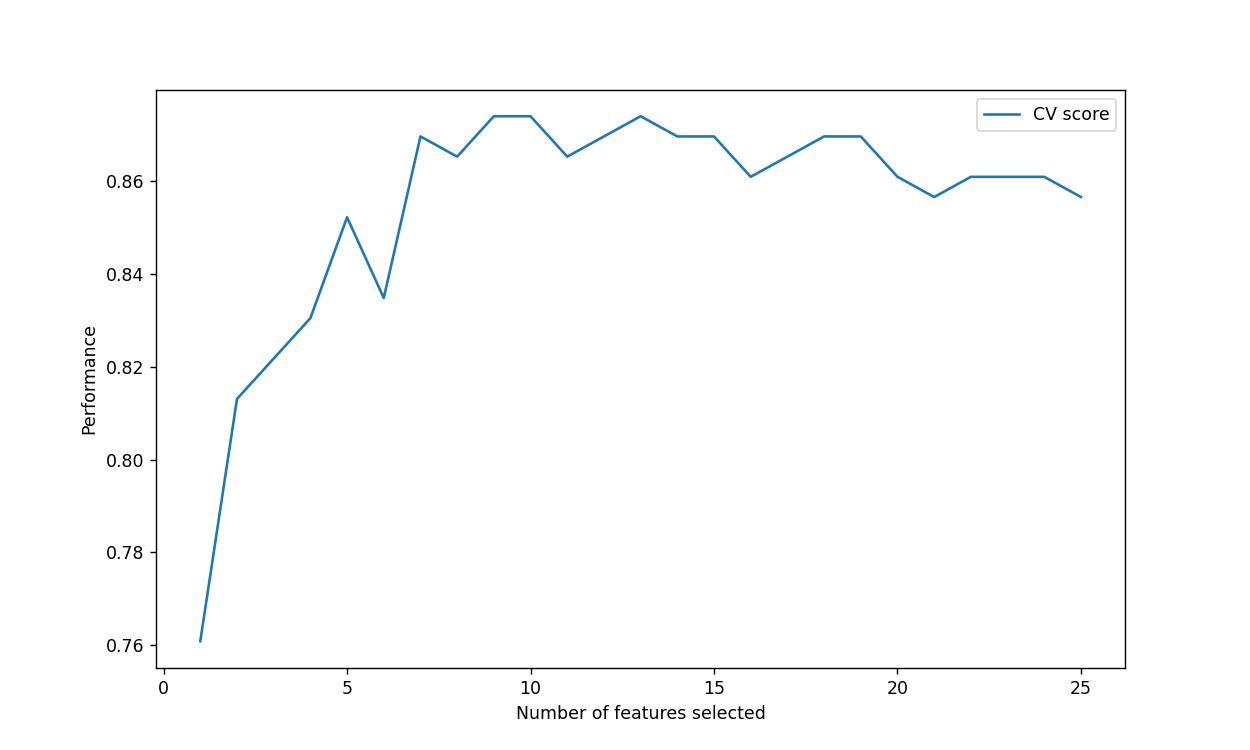

Column names of the best features:
Index(['AFP', 'ALB', 'ALT', 'CA199', 'CA724', 'CEA', 'CL', 'CO2CP', 'CREA',
       'GLO', 'HE4', 'LYM', 'LYM1', 'MPV', 'PHOS', 'TP'],
      dtype='object')


In [23]:
# rfecv - all - rf
rfecv = RFECV(estimator=xg, step=2, cv=10, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(x, y)

# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Get the column names of the best features
best_features = x.columns[rfecv.support_]

# print the column names of the selected features
print("Column names of the best features:")
print(best_features)

In [24]:
x_rfecv = x[best_features]
xs= scaler.fit_transform(x_rfecv)
x_rfecv

,AFP,ALB,ALT,CA199,CA724,CEA,CL,CO2CP,CREA,GLO,HE4,LYM,LYM1,MPV,PHOS,TP
0,3.580000,45.400000,11.000000,36.480000,6.420000,1.400000,107.400000,19.9,95.768989,28.500000,126.071034,0.65,16.8,11.70,1.46,73.900000
1,1.500000,45.400000,9.000000,12.180000,5.205010,0.770000,102.600000,22.2,48.000000,32.500000,47.560000,1.10,23.7,11.40,0.97,77.900000
2,2.360000,35.000000,21.000000,11.150000,12.120032,0.420000,99.600000,26.2,70.300000,31.500000,126.071034,1.98,28.8,10.40,0.94,66.500000
3,3.790000,32.900000,32.791227,22.570000,0.740000,1.330000,99.300000,20.1,80.700000,39.400000,49.950000,0.52,11.1,9.49,0.68,72.300000
4,6.467504,40.276145,21.993490,58.787461,10.265926,4.028906,103.200000,21.3,44.000000,30.921788,14.923059,1.28,32.7,12.10,1.50,69.669126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,48.600000,30.000000,8.370000,3.689259,0.590000,96.500000,24.6,67.000000,25.800000,40.170000,1.36,24.3,10.90,1.07,74.400000
226,2.090000,48.600000,32.791227,15.110000,4.435316,1.740000,98.100000,25.9,54.000000,31.800000,31.450000,1.18,30.7,9.90,0.99,80.400000
227,2.000000,46.100000,9.000000,0.620000,3.688458,1.670000,103.600000,25.0,67.000000,27.400000,44.440000,1.39,23.3,11.90,0.95,73.500000
228,1.840000,47.800000,26.000000,10.710000,3.454727,0.930000,93.338729,23.1,59.000000,28.200000,30.780000,2.15,20.6,10.50,1.31,76.000000


In [25]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            21.635966
score_time           0.688953
test_accuracy       88.260870
test_recall         76.250000
test_specificity    94.083333
test_gmean          84.240389
test_roc            85.166667
test_precision      87.976190
test_mcc            73.609484
dtype: float64

<IPython.core.display.Javascript object>


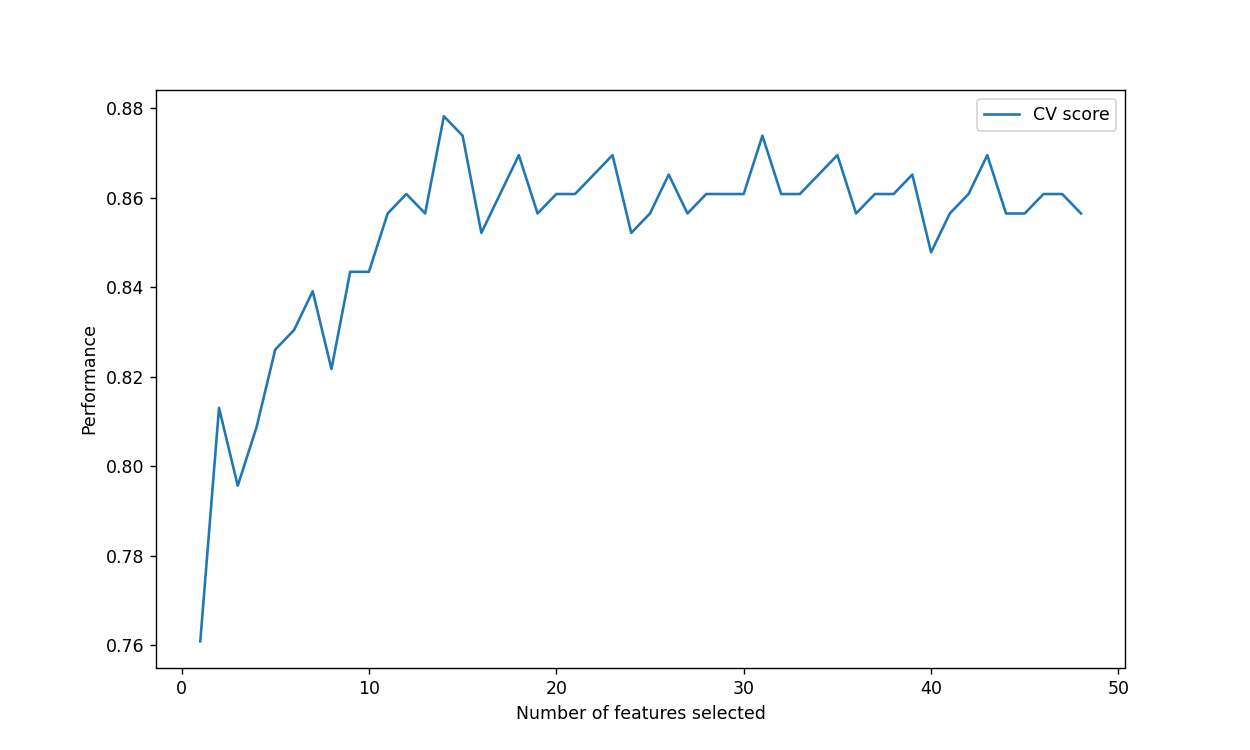

Column names of the best features:
Index(['AFP', 'ALT', 'CA199', 'CA724', 'CEA', 'CL', 'CO2CP', 'GLO', 'HE4',
       'LYM', 'LYM1', 'MPV', 'PHOS', 'TBIL'],
      dtype='object')


In [26]:
# rfecv - all - xg
rfecv = RFECV(estimator=xg, step=1, cv=10, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(x, y)

# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Get the column names of the best features
best_features = x.columns[rfecv.support_]

# print the column names of the selected features
print("Column names of the best features:")
print(best_features)

In [27]:
x_rfecv = x[best_features]
xs= scaler.fit_transform(x_rfecv)
x_rfecv

,AFP,ALT,CA199,CA724,CEA,CL,CO2CP,GLO,HE4,LYM,LYM1,MPV,PHOS,TBIL
0,3.580000,11.000000,36.480000,6.420000,1.400000,107.400000,19.9,28.500000,126.071034,0.65,16.8,11.70,1.46,5.500000
1,1.500000,9.000000,12.180000,5.205010,0.770000,102.600000,22.2,32.500000,47.560000,1.10,23.7,11.40,0.97,14.800000
2,2.360000,21.000000,11.150000,12.120032,0.420000,99.600000,26.2,31.500000,126.071034,1.98,28.8,10.40,0.94,5.300000
3,3.790000,32.791227,22.570000,0.740000,1.330000,99.300000,20.1,39.400000,49.950000,0.52,11.1,9.49,0.68,8.100000
4,6.467504,21.993490,58.787461,10.265926,4.028906,103.200000,21.3,30.921788,14.923059,1.28,32.7,12.10,1.50,9.089676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,30.000000,8.370000,3.689259,0.590000,96.500000,24.6,25.800000,40.170000,1.36,24.3,10.90,1.07,7.700000
226,2.090000,32.791227,15.110000,4.435316,1.740000,98.100000,25.9,31.800000,31.450000,1.18,30.7,9.90,0.99,10.700000
227,2.000000,9.000000,0.620000,3.688458,1.670000,103.600000,25.0,27.400000,44.440000,1.39,23.3,11.90,0.95,17.200000
228,1.840000,26.000000,10.710000,3.454727,0.930000,93.338729,23.1,28.200000,30.780000,2.15,20.6,10.50,1.31,11.300000


In [28]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            111.731071
score_time            0.535991
test_accuracy        85.652174
test_recall          72.500000
test_specificity     92.208333
test_gmean           81.201675
test_roc             82.354167
test_precision       84.087302
test_mcc             67.940003
dtype: float64

# GA - XG

In [29]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [31]:
model=xg
from genetic_selection import GeneticSelectionCV
for i in range(2,12):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=12,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(x, y)
    genfeats = x.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['AST', 'HE4']
Chosen Feats:   ['GLO', 'HE4', 'MPV']
Chosen Feats:   ['CA724', 'CEA', 'HE4', 'PHOS']
Chosen Feats:   ['ALB', 'CA724', 'HE4', 'MCH']
Chosen Feats:   ['ALB', 'HE4', 'LYM', 'Na', 'RDW', 'UA']
Chosen Feats:   ['ALB', 'CEA', 'HE4', 'HGB', 'LYM', 'Na']
Chosen Feats:   ['ALB', 'CA125', 'CEA', 'EO', 'GLO', 'HE4', 'Na']
Chosen Feats:   ['ALT', 'CEA', 'HE4', 'PDW', 'RDW', 'TP']
Chosen Feats:   ['ALB', 'ALP', 'CA125', 'CEA', 'GLU', 'HE4', 'IBIL', 'LYM']
Chosen Feats:   ['AFP', 'ALB', 'ALP', 'AST', 'BUN', 'CA724', 'CEA', 'HE4', 'Na', 'RBC']


In [32]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['ALB', 'ALP', 'CA125', 'CEA', 'GLU', 'HE4', 'IBIL', 'LYM']


In [33]:
report

,No of Feats,Chosen Feats,Scores
8,8,"[ALB, ALP, CA125, CEA, GLU, HE4, IBIL, LYM]",0.88696
5,6,"[ALB, CEA, HE4, HGB, LYM, Na]",0.87391
6,7,"[ALB, CA125, CEA, EO, GLO, HE4, Na]",0.86957
7,6,"[ALT, CEA, HE4, PDW, RDW, TP]",0.86522
9,10,"[AFP, ALB, ALP, AST, BUN, CA724, CEA, HE4, Na,...",0.86522
4,6,"[ALB, HE4, LYM, Na, RDW, UA]",0.85652
2,4,"[CA724, CEA, HE4, PHOS]",0.84783
3,4,"[ALB, CA724, HE4, MCH]",0.84348
1,3,"[GLO, HE4, MPV]",0.83478
0,2,"[AST, HE4]",0.81739


In [34]:
ga_feature= ['ALB', 'ALP', 'CA125', 'CEA', 'GLU', 'HE4', 'IBIL', 'LYM']

In [35]:
x_ga= x[ga_feature]
x_ga

,ALB,ALP,CA125,CEA,GLU,HE4,IBIL,LYM
0,45.400000,56.000000,15.360000,1.400000,4.670000,126.071034,3.500000,0.65
1,45.400000,77.000000,56.080000,0.770000,4.640000,47.560000,10.100000,1.10
2,35.000000,47.000000,219.808907,0.420000,4.070000,126.071034,3.100000,1.98
3,32.900000,118.000000,55.970000,1.330000,7.170469,49.950000,2.200000,0.52
4,40.276145,74.198102,219.808907,4.028906,7.100000,14.923059,5.961062,1.28
...,...,...,...,...,...,...,...,...
225,48.600000,60.000000,13.610000,0.590000,4.390000,40.170000,4.800000,1.36
226,48.600000,65.000000,50.800000,1.740000,5.130000,31.450000,6.900000,1.18
227,46.100000,49.000000,21.930000,1.670000,4.590000,44.440000,11.300000,1.39
228,47.800000,64.000000,53.870000,0.930000,5.590000,30.780000,7.800000,2.15


In [36]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [37]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            23.616138
score_time           1.093819
test_accuracy       86.086957
test_recall         72.321429
test_specificity    92.791667
test_gmean          81.508171
test_roc            82.556548
test_precision      83.670635
test_mcc            67.991660
dtype: float64

In [38]:
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            12.646241
score_time           0.844283
test_accuracy       88.695652
test_recall         74.666667
test_specificity    95.483871
test_gmean          83.985394
test_roc            85.075269
test_precision      89.545788
test_mcc            74.008326
dtype: float64

# GA - XG - 25

In [39]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [40]:
fcorr= ['CA125', 'CA724', 'ALB', 'HE4', 'Age', 'LYM1', 'CEA', 'GLO', 'HGB',
       'NEU', 'MCH', 'PLT', 'TP', 'CA199', 'LYM', 'Ca', 'IBIL', 'TBIL',
       'RDW', 'AST','CO2CP','AFP','Na','AG','BUN']

In [41]:
xc= x.loc[:,fcorr]
xc

,CA125,CA724,ALB,HE4,Age,LYM1,CEA,GLO,HGB,NEU,MCH,PLT,TP,CA199,LYM,Ca,IBIL,TBIL,RDW,AST,CO2CP,AFP,Na,AG,BUN
0,15.360000,6.420000,45.400000,126.071034,47,16.8,1.400000,28.500000,91.417547,76.200000,33.700000,74.0,73.900000,36.480000,0.65,2.48,3.500000,5.500000,13.700000,24.000000,19.9,3.580000,141.300000,19.36,5.35
1,56.080000,5.205010,45.400000,47.560000,39,23.7,0.770000,32.500000,131.000000,69.700000,28.400000,112.0,77.900000,12.180000,1.10,2.57,10.100000,14.800000,12.000000,18.000000,22.2,1.500000,138.900000,18.40,3.80
2,219.808907,12.120032,35.000000,126.071034,45,28.8,0.420000,31.500000,122.000000,59.500000,27.700000,272.0,66.500000,11.150000,1.98,2.48,3.100000,5.300000,13.400000,27.000000,26.2,2.360000,141.000000,19.97,4.89
3,55.970000,0.740000,32.900000,49.950000,44,11.1,1.330000,39.400000,96.500000,86.800000,23.962632,279.0,72.300000,22.570000,0.52,2.49,2.200000,8.100000,16.658245,32.000000,20.1,3.790000,132.493948,17.39,4.47
4,219.808907,10.265926,40.276145,14.923059,53,32.7,4.028906,30.921788,138.000000,60.500000,29.700000,148.0,69.669126,58.787461,1.28,2.24,5.961062,9.089676,12.100000,18.769079,21.3,6.467504,137.700000,21.87,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,13.610000,3.689259,48.600000,40.170000,43,24.3,0.590000,25.800000,147.000000,70.308467,30.400000,210.0,74.400000,8.370000,1.36,2.58,4.800000,7.700000,12.100000,16.000000,24.6,3.270000,138.300000,21.32,4.86
226,50.800000,4.435316,48.600000,31.450000,52,30.7,1.740000,31.800000,142.000000,61.703680,31.100000,219.0,80.400000,15.110000,1.18,2.81,6.900000,10.700000,11.900000,30.000000,25.9,2.090000,140.800000,20.91,4.29
227,21.930000,3.688458,46.100000,44.440000,37,23.3,1.670000,27.400000,91.417547,70.985385,23.962632,262.0,73.500000,0.620000,1.39,2.29,11.300000,17.200000,16.658245,20.000000,25.0,2.000000,137.100000,12.14,3.12
228,53.870000,3.454727,47.800000,30.780000,30,20.6,0.930000,28.200000,154.000000,72.796501,28.800000,398.0,76.000000,10.710000,2.15,2.82,7.800000,11.300000,12.500000,22.000000,23.1,1.840000,139.200000,27.22,3.61


In [42]:
model=xg
from genetic_selection import GeneticSelectionCV
for i in range(2,15):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=15,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=15,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(xc, y)
    genfeats = xc.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['HE4', 'AST']
Chosen Feats:   ['CA125', 'HE4', 'CEA']
Chosen Feats:   ['HE4', 'CEA', 'RDW', 'CO2CP']
Chosen Feats:   ['CA724', 'HE4', 'CEA', 'GLO', 'AFP']
Chosen Feats:   ['ALB', 'HE4', 'CEA', 'GLO', 'LYM', 'Na']
Chosen Feats:   ['HE4', 'CEA', 'LYM', 'Na']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'CEA', 'TP', 'LYM', 'TBIL', 'Na']
Chosen Feats:   ['CA125', 'CA724', 'ALB', 'HE4', 'CEA', 'GLO', 'AST', 'AFP']
Chosen Feats:   ['HE4', 'CEA', 'GLO', 'NEU', 'LYM', 'Ca', 'IBIL', 'AST', 'CO2CP']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'CEA', 'GLO', 'MCH', 'TP', 'IBIL', 'Na']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'Age', 'LYM1', 'CEA', 'NEU', 'RDW', 'Na']
Chosen Feats:   ['ALB', 'HE4', 'CEA', 'MCH', 'LYM', 'IBIL', 'RDW', 'CO2CP', 'Na']
Chosen Feats:   ['CA125', 'CA724', 'ALB', 'HE4', 'CEA', 'GLO', 'MCH', 'TP', 'LYM', 'CO2CP', 'AFP']


In [43]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['ALB', 'HE4', 'CEA', 'MCH', 'LYM', 'IBIL', 'RDW', 'CO2CP', 'Na']


In [44]:
report

,No of Feats,Chosen Feats,Scores
11,9,"[ALB, HE4, CEA, MCH, LYM, IBIL, RDW, CO2CP, Na]",0.89565
6,8,"[CA125, ALB, HE4, CEA, TP, LYM, TBIL, Na]",0.89130
12,11,"[CA125, CA724, ALB, HE4, CEA, GLO, MCH, TP, LY...",0.89130
9,9,"[CA125, ALB, HE4, CEA, GLO, MCH, TP, IBIL, Na]",0.88696
4,6,"[ALB, HE4, CEA, GLO, LYM, Na]",0.88261
10,9,"[CA125, ALB, HE4, Age, LYM1, CEA, NEU, RDW, Na]",0.88261
7,8,"[CA125, CA724, ALB, HE4, CEA, GLO, AST, AFP]",0.87391
5,4,"[HE4, CEA, LYM, Na]",0.86957
8,9,"[HE4, CEA, GLO, NEU, LYM, Ca, IBIL, AST, CO2CP]",0.86522
3,5,"[CA724, HE4, CEA, GLO, AFP]",0.84783


In [45]:
ga_feature= ['ALB', 'HE4', 'CEA', 'MCH', 'LYM', 'IBIL', 'RDW', 'CO2CP', 'Na']

In [46]:
x_ga= x[ga_feature]
x_ga

,ALB,HE4,CEA,MCH,LYM,IBIL,RDW,CO2CP,Na
0,45.400000,126.071034,1.400000,33.700000,0.65,3.500000,13.700000,19.9,141.300000
1,45.400000,47.560000,0.770000,28.400000,1.10,10.100000,12.000000,22.2,138.900000
2,35.000000,126.071034,0.420000,27.700000,1.98,3.100000,13.400000,26.2,141.000000
3,32.900000,49.950000,1.330000,23.962632,0.52,2.200000,16.658245,20.1,132.493948
4,40.276145,14.923059,4.028906,29.700000,1.28,5.961062,12.100000,21.3,137.700000
...,...,...,...,...,...,...,...,...,...
225,48.600000,40.170000,0.590000,30.400000,1.36,4.800000,12.100000,24.6,138.300000
226,48.600000,31.450000,1.740000,31.100000,1.18,6.900000,11.900000,25.9,140.800000
227,46.100000,44.440000,1.670000,23.962632,1.39,11.300000,16.658245,25.0,137.100000
228,47.800000,30.780000,0.930000,28.800000,2.15,7.800000,12.500000,23.1,139.200000


In [47]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [48]:
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            11.918921
score_time           0.769529
test_accuracy       89.565217
test_recall         77.333333
test_specificity    95.483871
test_gmean          85.709151
test_roc            86.408602
test_precision      88.881452
test_mcc            75.698305
dtype: float64

In [49]:
ga_feature= ['ALB', 'HE4', 'CEA', 'LYM', 'TBIL', 'Na','CA125']

In [50]:
x_ga= x[ga_feature]
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.358392
score_time           0.829930
test_accuracy       86.956522
test_recall         73.333333
test_specificity    93.548387
test_gmean          82.552567
test_roc            83.440860
test_precision      84.522145
test_mcc            69.633433
dtype: float64

# GA - XG - corr 

In [51]:
fcorr= ['CA125', 'CA724', 'ALB', 'HE4', 'Age', 'LYM1', 'CEA', 'GLO', 'HGB',
       'NEU', 'MCH', 'PLT', 'TP', 'CA199', 'LYM', 'Ca', 'IBIL', 'TBIL',
       'RDW', 'AST']

In [52]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [53]:
xc= x.loc[:,fcorr]

In [54]:
model=xg
from genetic_selection import GeneticSelectionCV
for i in range(2,15):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=15,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=15,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(xc, y)
    genfeats = xc.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['HE4', 'AST']
Chosen Feats:   ['HE4', 'AST']
Chosen Feats:   ['HE4', 'CEA', 'GLO', 'LYM']
Chosen Feats:   ['ALB', 'HE4', 'LYM', 'IBIL']
Chosen Feats:   ['ALB', 'HE4', 'CEA', 'TBIL', 'RDW']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'CEA', 'TP', 'LYM']
Chosen Feats:   ['HE4', 'CEA', 'GLO', 'TP', 'LYM']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'CEA', 'TP', 'LYM']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'CEA', 'TP', 'LYM']
Chosen Feats:   ['ALB', 'HE4', 'CEA', 'GLO', 'TP', 'CA199', 'LYM', 'RDW']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'Age', 'CEA', 'GLO', 'TP', 'CA199', 'LYM', 'IBIL', 'TBIL', 'RDW']
Chosen Feats:   ['CA125', 'ALB', 'HE4', 'CEA', 'TP', 'LYM', 'Ca', 'IBIL']
Chosen Feats:   ['ALB', 'HE4', 'CEA', 'GLO', 'TP', 'CA199', 'LYM', 'RDW']


In [55]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['CA125', 'ALB', 'HE4', 'Age', 'CEA', 'GLO', 'TP', 'CA199', 'LYM', 'IBIL', 'TBIL', 'RDW']


In [56]:
report

,No of Feats,Chosen Feats,Scores
10,12,"[CA125, ALB, HE4, Age, CEA, GLO, TP, CA199, LY...",0.89130
5,6,"[CA125, ALB, HE4, CEA, TP, LYM]",0.88696
7,6,"[CA125, ALB, HE4, CEA, TP, LYM]",0.88696
8,6,"[CA125, ALB, HE4, CEA, TP, LYM]",0.88696
11,8,"[CA125, ALB, HE4, CEA, TP, LYM, Ca, IBIL]",0.88696
9,8,"[ALB, HE4, CEA, GLO, TP, CA199, LYM, RDW]",0.88261
12,8,"[ALB, HE4, CEA, GLO, TP, CA199, LYM, RDW]",0.88261
6,5,"[HE4, CEA, GLO, TP, LYM]",0.86957
4,5,"[ALB, HE4, CEA, TBIL, RDW]",0.86522
2,4,"[HE4, CEA, GLO, LYM]",0.85217


In [57]:
ga_feature= ['CA125', 'ALB', 'HE4', 'CEA', 'TP', 'LYM']

In [58]:
x_ga= x[ga_feature]
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            12.611699
score_time           0.720177
test_accuracy       88.695652
test_recall         76.000000
test_specificity    94.838710
test_gmean          84.358450
test_roc            85.419355
test_precision      87.555556
test_mcc            73.752003
dtype: float64

In [61]:
ga_feature= ['GLO', 'ALB', 'HE4', 'CEA', 'CO2CP', 'CA724']

In [62]:
x_ga= x[ga_feature]
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)
score = cross_validate(xg, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            12.301183
score_time           0.760174
test_accuracy       83.913043
test_recall         69.333333
test_specificity    90.967742
test_gmean          78.993798
test_roc            80.150538
test_precision      79.476190
test_mcc            62.869941
dtype: float64

# GA - LR

In [12]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

lr = LogisticRegression(solver='liblinear')
model=lr 

from genetic_selection import GeneticSelectionCV
for i in range(2,20):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=12,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=15,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(x, y)
    genfeats = x.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['CEA', 'HE4']
Chosen Feats:   ['GGT', 'HE4', 'HGB']
Chosen Feats:   ['GLU', 'HE4', 'PHOS', 'PLT']
Chosen Feats:   ['CA125', 'CEA', 'HE4', 'PDW', 'RDW']
Chosen Feats:   ['CA724', 'CEA', 'HE4', 'LYM1', 'PHOS', 'TBIL']
Chosen Feats:   ['Age', 'ALB', 'CA724', 'CEA', 'HE4', 'MCH']
Chosen Feats:   ['ALB', 'ALP', 'Ca', 'CEA', 'EO1', 'HE4', 'MCH']
Chosen Feats:   ['CA724', 'CEA', 'GLO', 'HE4', 'Na', 'PHOS']
Chosen Feats:   ['ALB', 'AST', 'CEA', 'HE4', 'MCH', 'PDW']
Chosen Feats:   ['AFP', 'Age', 'ALP', 'AST', 'CA125', 'CA724', 'HE4', 'MCH', 'MPV', 'PDW']
Chosen Feats:   ['AFP', 'ALB', 'CA724', 'CEA', 'CO2CP', 'HE4', 'MPV', 'PLT']
Chosen Feats:   ['AST', 'BASO1', 'CA724', 'CO2CP', 'GLO', 'HE4', 'RBC']
Chosen Feats:   ['ALB', 'AST', 'CA724', 'HE4', 'PDW', 'RBC', 'RDW']
Chosen Feats:   ['AG', 'ALP', 'Ca', 'CA724', 'CEA', 'GGT', 'GLO', 'HE4', 'LYM', 'PHOS', 'TP']
Chosen Feats:   ['Age', 'ALB', 'AST', 'BASO', 'BASO1', 'CA199', 'CA724', 'CREA', 'HCT', 'HE4', 'Mg', 'PDW', 'RBC', 'RDW

In [13]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['ALB', 'Ca', 'CA724', 'CEA', 'GLO', 'HE4', 'LYM', 'NEU', 'PHOS']


In [14]:
report

,No of Feats,Chosen Feats,Scores
17,9,"[ALB, Ca, CA724, CEA, GLO, HE4, LYM, NEU, PHOS]",0.87826
15,13,"[AFP, ALB, BASO1, Ca, CA199, CEA, CL, HCT, HE4...",0.87826
13,11,"[AG, ALP, Ca, CA724, CEA, GGT, GLO, HE4, LYM, ...",0.87826
10,8,"[AFP, ALB, CA724, CEA, CO2CP, HE4, MPV, PLT]",0.86957
16,15,"[AFP, ALB, ALT, BASO, BASO1, CA724, CEA, CO2CP...",0.86957
7,6,"[CA724, CEA, GLO, HE4, Na, PHOS]",0.86957
3,5,"[CA125, CEA, HE4, PDW, RDW]",0.86522
4,6,"[CA724, CEA, HE4, LYM1, PHOS, TBIL]",0.86522
8,6,"[ALB, AST, CEA, HE4, MCH, PDW]",0.86522
12,7,"[ALB, AST, CA724, HE4, PDW, RBC, RDW]",0.86087


In [16]:
ga_feature= [ 'ALB', 'Ca', 'CA724', 'CEA', 'GLO', 'HE4', 'LYM', 'NEU', 'PHOS']
x_ga= x[ga_feature]
xs= scaler.fit_transform(x_ga)
score = cross_validate(lr, xs,y, cv=5, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.020757
score_time           0.050097
test_accuracy       87.826087
test_recall         69.333333
test_specificity    96.774194
test_gmean          81.608356
test_roc            83.053763
test_precision      91.715507
test_mcc            71.963870
dtype: float64

# Force Plot

# Model predictions on test set

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=10)

In [71]:
ga_feature= ['ALB', 'HE4', 'CEA', 'MCH', 'LYM', 'IBIL', 'RDW', 'CO2CP', 'Na']
x_ga= x_train[ga_feature]
x_train_s= scaler.fit_transform(x_ga)

In [72]:
x_test_ga = x_test[ga_feature]
x_test_s= scaler.fit_transform(x_test_ga)

In [73]:
x_test_ga

,ALB,HE4,CEA,MCH,LYM,IBIL,RDW,CO2CP,Na
87,41.600000,41.540000,1.620000,23.962632,2.000000,8.600000,16.658245,25.500000,136.3
26,27.900000,126.071034,0.590000,24.700000,2.550000,3.200000,15.900000,24.600000,138.8
76,40.600000,49.470000,1.320000,27.190000,1.410000,9.000000,15.360000,23.300000,140.0
68,42.000000,69.850000,2.070000,28.300000,1.830000,2.900000,14.900000,26.900000,144.0
78,45.900000,44.040000,1.160000,30.000000,2.130000,6.200000,13.700000,21.000000,138.0
149,32.400000,45.570000,4.192118,28.400000,1.110000,5.000000,13.900000,26.400000,139.6
127,40.200000,38.790000,1.090000,25.500000,1.270000,5.100000,16.658245,25.800000,141.5
60,34.400000,39.720000,4.192118,23.962632,1.260000,2.700000,16.658245,20.400000,147.2
69,46.500000,37.920000,0.310000,29.600000,1.890000,6.600000,13.800000,23.600000,133.0
124,47.800000,38.800000,0.910000,29.000000,2.480000,7.400000,15.900000,22.600000,139.8


In [113]:
x_test_ga.shape

(58, 9)

In [74]:
xg.fit(x_train_s,y_train) 
predictions = xg.predict(x_test_s)

In [133]:
predictions

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
out = predictions==y_test
out

87      True
26      True
76      True
68      True
78      True
149     True
127     True
60      True
69      True
124     True
228     True
183     True
201     True
95      True
120     True
194     True
56      True
83      True
103     True
102     True
49      True
138     True
199     True
159     True
178     True
146     True
24      True
63      True
35      True
19      True
192     True
186     True
160     True
47      True
170     True
214     True
188     True
121    False
61      True
152     True
20      True
131     True
5      False
129     True
70      True
166     True
98      True
1      False
2       True
59      True
55     False
10     False
58     False
46     False
6      False
111     True
176     True
187     True
Name: Type, dtype: bool

In [123]:
out.index

Int64Index([ 87,  26,  76,  68,  78, 149, 127,  60,  69, 124, 228, 183, 201,
             95, 120, 194,  56,  83, 103, 102,  49, 138, 199, 159, 178, 146,
             24,  63,  35,  19, 192, 186, 160,  47, 170, 214, 188, 121,  61,
            152,  20, 131,   5, 129,  70, 166,  98,   1,   2,  59,  55,  10,
             58,  46,   6, 111, 176, 187],
           dtype='int64')

In [125]:
out.shape

(58,)

In [131]:
out.index[54]  #iloc to loc

6

In [148]:
y_test

87     0
26     1
76     0
68     0
78     0
149    1
127    0
60     1
69     0
124    0
228    0
183    0
201    0
95     0
120    0
194    0
56     1
83     0
103    0
102    0
49     1
138    0
199    0
159    0
178    0
146    1
24     1
63     1
35     1
19     1
192    0
186    0
160    0
47     1
170    0
214    0
188    0
121    0
61     1
152    1
20     1
131    0
5      1
129    0
70     0
166    0
98     0
1      1
2      1
59     1
55     1
10     1
58     1
46     1
6      1
111    0
176    0
187    0
Name: Type, dtype: int64

# force plot on test cases

In [77]:
import shap

In [83]:
choosen_instance = x_test_ga.loc[[121]]
choosen_instance 

,ALB,HE4,CEA,MCH,LYM,IBIL,RDW,CO2CP,Na
121,36.1,43.45,1.41,32.5,0.77,5.0,14.7,23.3,138.4


In [150]:
xg.fit(x_train_s,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [151]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(choosen_instance)
shap_values

array([[-0.6470786 ,  3.7787764 ,  1.553132  , -0.2268771 ,  0.34911707,
        -0.2061795 ,  0.54131716, -0.340048  ,  0.2860273 ]],
      dtype=float32)

In [152]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], choosen_instance)

# force plot - predicted value [0,1]

In [144]:
shap.initjs()
def p(j):
    explainer = shap.TreeExplainer(xg)
    xgb_binary_shap_values = explainer.shap_values(x_test_ga)
    return(shap.force_plot(explainer.expected_value, xgb_binary_shap_values[j,:], x_test_ga.iloc[j,:], link='logit'))

In [149]:
y_test.iloc[0]

0

In [145]:
p0=p(0)

In [146]:
p0

In [112]:
shap.save_html("index.htm",p0)

In [116]:
y_test.iloc[54]

1

In [114]:
p54=p(54)
p54

In [117]:
y_test.iloc[52]

1

In [118]:
p52=p(52)
p52

In [119]:
shap.save_html("index.htm",p52)

In [120]:
y_test.loc[6]

1

In [132]:
p54=p(54)
p54

In [147]:
p(9)